In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import imghdr
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# train_dir = '/content/drive/MyDrive/Medicaldataset/Medical_Imaging/Medical-imaging-train'
# test_dir = '/content/drive/MyDrive/Medicaldataset/Medical_Imaging/Medical-imaging-test'

In [4]:
os.listdir(train_dir)

['Neoplasm', 'Diverticulosis', 'Ureters', 'Peritonitis']

In [5]:
for image_class in os.listdir(train_dir):
  print(image_class)

Neoplasm
Diverticulosis
Ureters
Peritonitis


In [6]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/Medicaldataset/Medical_Imaging','/content/drive/MyDrive/Medicaldataset/Medical_Imaging/Medical-imaging-train','/content/drive/MyDrive/Medicaldataset/Medical_Imaging/Medical-imaging-train/Neoplasm','d4a092a5-8e25-43bd-84d0-e80d3e58a443.jpg'))

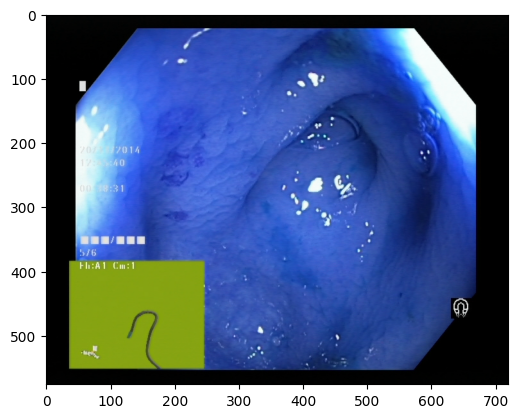

In [7]:
plt.imshow(img)

In [8]:
print(img)

[[[3 5 5]
  [3 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [6 6 6]
  [6 6 6]]

 [[3 5 5]
  [3 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [5 5 5]
  [6 6 6]]

 [[3 5 5]
  [3 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 ...

 [[0 3 2]
  [0 3 2]
  [0 3 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[0 1 1]
  [0 1 1]
  [0 2 2]
  ...
  [2 2 2]
  [0 2 2]
  [0 2 2]]

 [[3 3 3]
  [3 3 3]
  [2 2 2]
  ...
  [2 2 2]
  [0 2 2]
  [0 2 2]]]


In [9]:
img.shape

(576, 720, 3)

In [10]:

df = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Medicaldataset/Medical_Imaging/Medical-imaging-train',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 1070 files belonging to 4 classes.


In [11]:
df_iterator = df.as_numpy_iterator()

In [12]:
batch = df_iterator.next()

In [13]:
batch[0].shape

(32, 224, 224, 3)

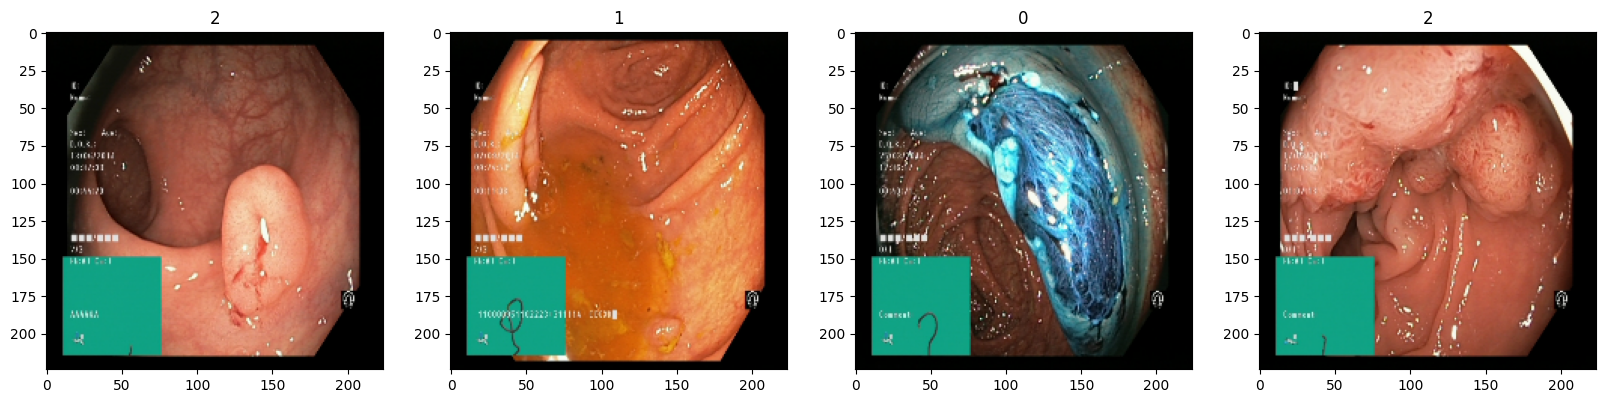

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])

plt.show()

In [15]:
batch[0].max()

255.0

In [16]:
scaled = batch[0]/255

In [17]:
df = df.map(lambda x, y: (x / 255, y))


In [18]:
scaled_iterator = df.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

In [20]:
batch[0].max()

1.0

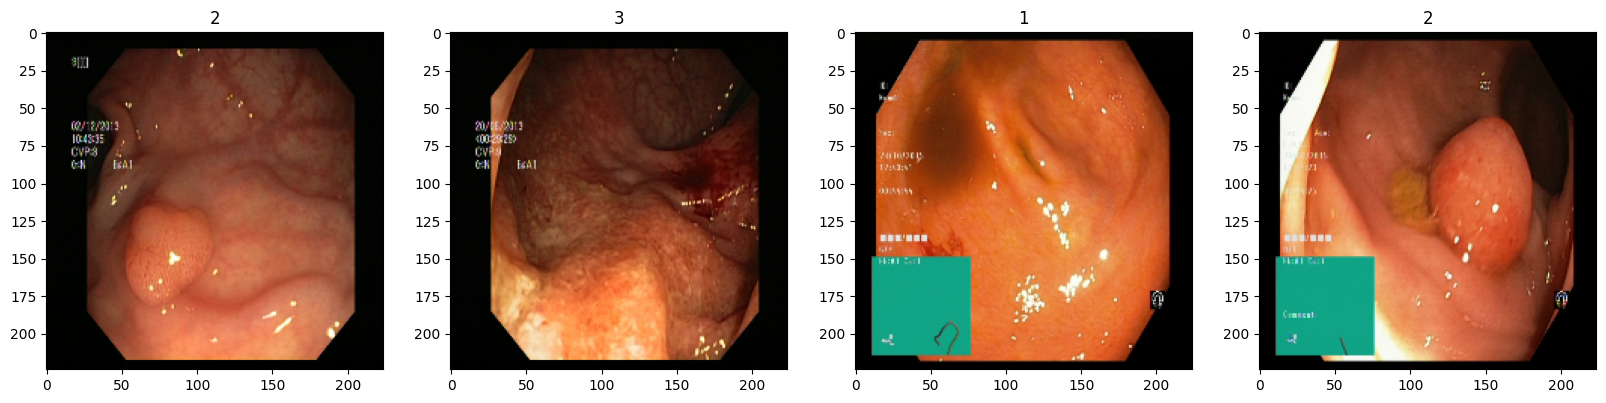

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].set_title(batch[1][idx])

plt.show()

In [22]:
len(df)

34

In [23]:
train_size = int(len(df)*.7)
val_size = int(len(df)*.2)+1
test_size = int(len(df)*.1)+1

In [24]:
train_size

23

In [25]:
val_size

7

In [26]:
test_size

4

In [27]:
train = df.take(train_size)
val = df.skip(train_size).take(val_size)
test = df.skip(train_size+val_size).take(test_size)

In [28]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

CODE TO CREATE PRETRAINED VGC16 MODEL

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_vgg16_model(input_shape=(224, 224, 3), num_classes=10):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use sigmoid if binary classification

    return model

# Example usage
input_shape = (224, 224, 3)
num_classes = 10
model = create_vgg16_model(input_shape=input_shape, num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,301,514 (512.32 MB)

 Trainable params: 134,301,514 (512.32 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train_dir = '/content/drive/MyDrive/Medicaldataset/Medical_Imaging/Medical-imaging-train'

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

loss, accuracy = model.evaluate(val_generator)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 856 images belonging to 4 classes.
Found 214 images belonging to 4 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 295s 8s/step - accuracy: 0.3084 - loss: 1.6001 - val_accuracy: 0.4766 - val_loss: 1.2052
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 657ms/step - accuracy: 0.4566 - loss: 1.2182 - val_accuracy: 0.6636 - val_loss: 0.9738
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 700ms/step - accuracy: 0.5006 - loss: 1.1016 - val_accuracy: 0.7664 - val_loss: 0.8336
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 666ms/step - accuracy: 0.6234 - loss: 0.9673 - val_accuracy: 0.7664 - val_loss: 0.7858
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 646ms/step - accuracy: 0.6287 - loss: 0.8881 - val_accuracy: 0.7944 - val_loss: 0.7150
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 655ms/step - accuracy: 0.6820 - loss: 0.7826 - val_accuracy: 0.8084 - val_loss: 0.5878
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 641ms/step - accuracy: 0.6961 - loss: 0.7835 - val_accuracy: 0.8364 - val_loss: 0.5750
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 662ms/step - accuracy: 0.7051 - loss: 0.7178 - val_accuracy: 0.8458 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,083,278 (130.02 MB)

 Trainable params: 6,456,196 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,912,394 (49.26 MB)

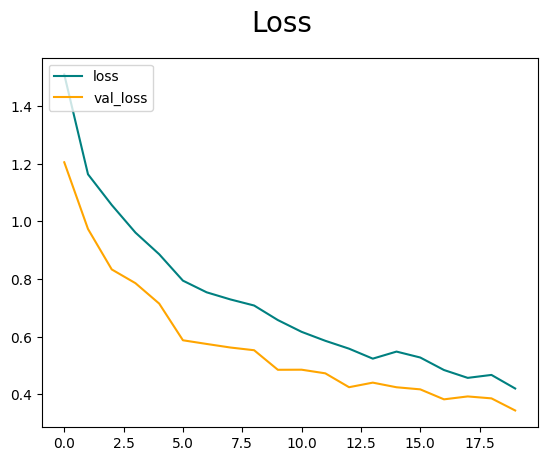

In [36]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

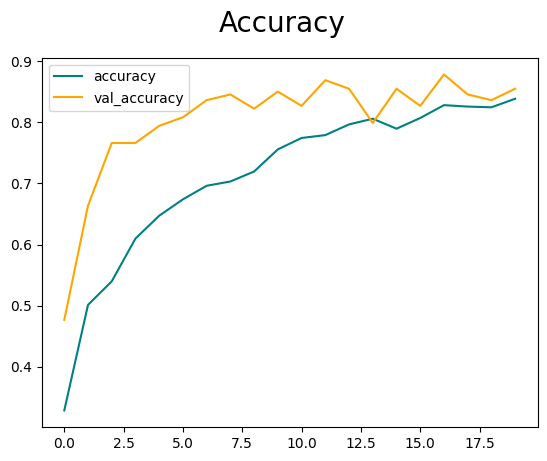

In [37]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch


    X_resized = tf.image.resize(X, (224, 224))


    yhat = model.predict(X_resized)


    y_onehot = tf.keras.utils.to_categorical(y, num_classes=4)


    pre.update_state(y_onehot, yhat)
    re.update_state(y_onehot, yhat)
    acc.update_state(y_onehot, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.92523366, shape=(), dtype=float32) tf.Tensor(0.9, shape=(), dtype=float32) tf.Tensor(0.95681816, shape=(), dtype=float32)


In [42]:
model.save('vgg16_medical_model.h5')

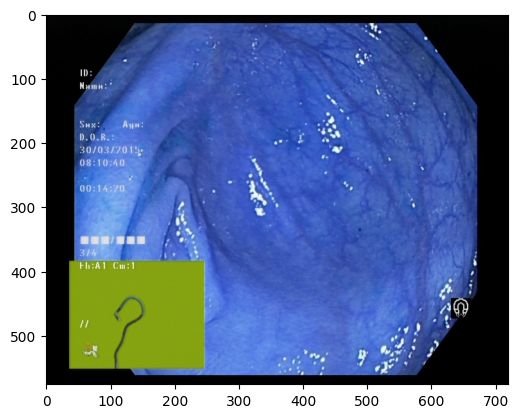

In [43]:
img = cv2.imread('/content/drive/MyDrive/Medicaldataset/Medical_Imaging/Medical-imaging-test/04d8ae41-0d9c-4994-b6ff-2466bccae84c.jpg')
plt.imshow(img)
plt.show()

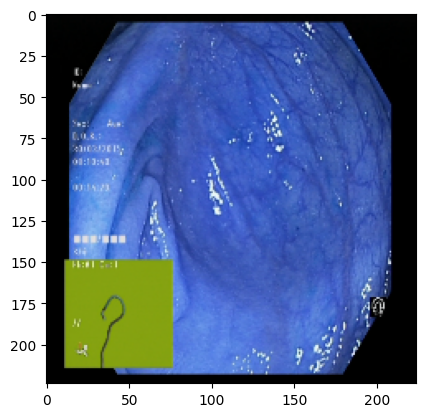

In [44]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
from tensorflow.keras.models import load_model

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [47]:
yhat

array([[0.02193064, 0.87214756, 0.02622362, 0.07969818]], dtype=float32)

In [48]:
map_classes = {
    0: 'Diverticulosis',
    1: 'Neoplasm',
    2: 'Peritonitis',
    3: 'Ureters'
}


predicted_class_index = np.argmax(yhat, axis=1)


print(f"Predicted class index: {predicted_class_index[0]}")
print(f"Predicted class name: {map_classes[predicted_class_index[0]]}")


Predicted class index: 1
Predicted class name: Neoplasm
